In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Ex 2

In [2]:
data = pd.read_csv('data_linear.csv.zip')

In [3]:
data.head()

,Diện tích,Giá
0,30.0000,448.524
1,32.4138,509.248
2,34.8276,535.104
3,37.2414,551.432
4,39.6552,623.418


In [4]:
mat = np.array(data, 'float')
mat

array([[  30.    ,  448.524 ],
       [  32.4138,  509.248 ],
       [  34.8276,  535.104 ],
       [  37.2414,  551.432 ],
       [  39.6552,  623.418 ],
       [  42.069 ,  625.992 ],
       [  44.4828,  655.248 ],
       [  46.8966,  701.377 ],
       [  49.3103,  748.918 ],
       [  51.7241,  757.881 ],
       [  54.1379,  831.004 ],
       [  56.5517,  855.409 ],
       [  58.9655,  866.707 ],
       [  61.3793,  902.545 ],
       [  63.7931,  952.261 ],
       [  66.2069,  995.531 ],
       [  68.6207, 1069.78  ],
       [  71.0345, 1074.42  ],
       [  73.4483, 1103.88  ],
       [  75.8621, 1138.69  ],
       [  78.2759, 1153.13  ],
       [  80.6897, 1240.27  ],
       [  83.1034, 1251.9   ],
       [  85.5172, 1287.97  ],
       [  87.931 , 1320.47  ],
       [  90.3448, 1374.92  ],
       [  92.7586, 1410.16  ],
       [  95.1724, 1469.69  ],
       [  97.5862, 1478.54  ],
       [ 100.    , 1515.28  ]])

In [5]:
N = data.shape[0]
x = mat[:, 0].reshape(-1, 1)
y = mat[:, 1].reshape(-1, 1)

Text(0, 0.5, 'giá')

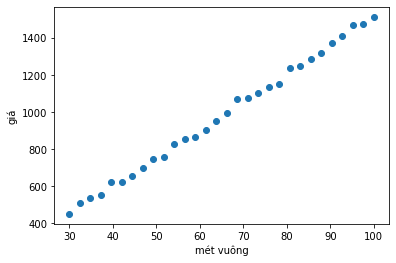

In [6]:
plt.scatter(x, y)
plt.xlabel('mét vuông')
plt.ylabel('giá')

In [7]:
x = np.hstack((np.ones((N, 1)), x))

In [8]:
from numpy.linalg import inv
beta = inv(x.T @x)@x.T @y
beta

array([[-7.06426865],
       [15.2110908 ]])

In [9]:
x1 = 50
y1 = beta[1]*x1 + beta[0]
y1

array([753.49027134])

In [10]:
x2 = 100
y2 = beta[1]*x2 + beta[0]
y2

array([1514.04481132])

In [11]:
x3 = 150
y3 = beta[1]*x3 + beta[0]
y3

array([2274.59935131])

## Ex 3

In [12]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data2 = pd.read_csv('housing.csv',header=None,delimiter=r'\s+', names=column_names)
data2.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [13]:
X = data2.drop('MEDV', axis=1).values
y = data2['MEDV'].values
N = data2.shape[0]

In [14]:
y = y.reshape(-1, 1)
y.shape

(506, 1)

In [15]:
ones = np.ones(shape=N).reshape(-1,1)
X = np.concatenate((ones, X), 1)
X

array([[1.0000e+00, 6.3200e-03, 1.8000e+01, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [1.0000e+00, 2.7310e-02, 0.0000e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [1.0000e+00, 2.7290e-02, 0.0000e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [1.0000e+00, 6.0760e-02, 0.0000e+00, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0000e+00, 1.0959e-01, 0.0000e+00, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [1.0000e+00, 4.7410e-02, 0.0000e+00, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [16]:
coef = inv(X.T @X)@X.T @y
coef

array([[ 3.64594884e+01],
       [-1.08011358e-01],
       [ 4.64204584e-02],
       [ 2.05586264e-02],
       [ 2.68673382e+00],
       [-1.77666112e+01],
       [ 3.80986521e+00],
       [ 6.92224640e-04],
       [-1.47556685e+00],
       [ 3.06049479e-01],
       [-1.23345939e-02],
       [-9.52747232e-01],
       [ 9.31168327e-03],
       [-5.24758378e-01]])

In [17]:
def predict(case):
    b_0 = coef[0]
    other_b = coef[1:]
    prediction = b_0
    for x_i, b_i in zip(case, other_b):
        prediction += (b_i * x_i)
        return prediction

In [18]:
predict(X[0])

array([36.35147703])